In [44]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [5]:
df_CO2 = pd.read_csv("./datasets/co2_emissions_tonnes_per_person.csv")


## Selecting the required years 
Let's try to find the GDP growth with that of CO2 from the period of 1910 to 2018. I expect, I would be able to see the effects of world war 1, ww 2, Internet boom of 90s, 2008 financial crisis and many more.

In [69]:
df=df_CO2[df_CO2['1910'].notnull()]
X =df.iloc[:,111:]
df_final =pd.concat([df['country'],X],axis=1)

In [85]:
df_final.shape

(55, 110)

In [86]:
df_final.head()

,country,1910,1911,1912,1913,1914,1915,1916,1917,1918,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
6,Argentina,1.320,1.430,1.320,1.380,1.150,0.897,0.628,0.274,0.3020,...,4.42,4.57,4.61,4.60,4.56,4.56,4.64,4.60,4.55,4.41
7,Armenia,0.181,0.186,0.209,0.225,0.202,0.183,0.194,0.177,0.0698,...,1.51,1.48,1.73,1.99,1.91,1.91,1.65,1.76,1.70,1.89
8,Australia,4.030,4.370,4.630,4.890,5.240,4.570,3.960,4.180,4.5300,...,18.80,18.40,18.00,17.80,17.10,16.70,16.80,17.00,17.00,16.90
9,Austria,8.760,7.300,7.580,9.080,7.450,5.340,1.230,0.531,0.5140,...,8.10,8.60,8.30,7.95,7.97,7.49,7.70,7.70,7.94,7.75
10,Azerbaijan,0.809,0.832,0.933,1.000,0.898,0.817,0.863,0.787,0.3110,...,3.57,3.39,3.61,3.79,3.74,3.88,3.86,3.82,3.73,3.70


We will be doing the analysis for 55 countries, from the period of 1910 to 2018

## Treating the Null Values
 Since there are not much values. Filled the null with the average of that particular year

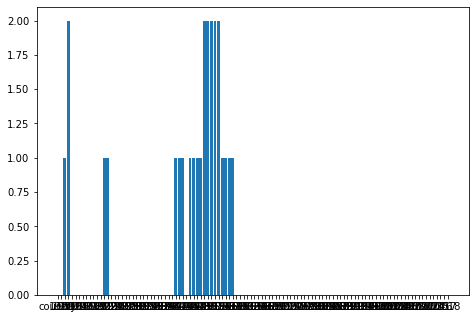

In [79]:
import matplotlib.pyplot as plt

null_count=[]
for item in df_final.columns:
    null_count.append(df_final[item].isna().sum())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_final.columns,null_count)
plt.show()

In [83]:
df_without_na=df_final.fillna(df.mean())

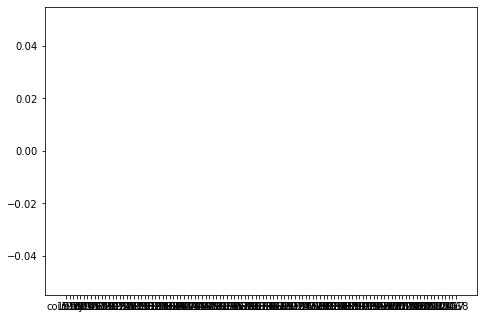

In [84]:
null_count=[]
for item in df_without_na.columns:
    null_count.append(df_without_na[item].isna().sum())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_without_na.columns,null_count)
plt.show()

## Repeating the above steps for GDP per person dataset

In [101]:
df_income = pd.read_csv("./datasets/income_per_person_gdppercapita_ppp_inflation_adjusted.csv")

df_inc=df_income[df_income['1910'].notnull()]
X =df_inc.iloc[:,111:220]
df_inc_final =pd.concat([df_inc['country'],X],axis=1)

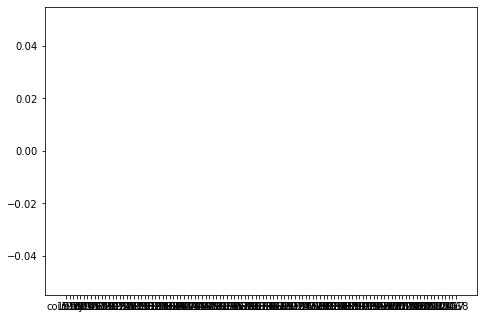

In [102]:
null_count=[]
for item in df_inc_final.columns:
    null_count.append(df_inc_final[item].isna().sum())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_inc_final.columns,null_count)
plt.show()

In this dataset, we don't have the problem of Null Values

In [103]:
df_inc_final.shape

(193, 110)

In this dataframe, we have the datas for about 193 countries. Since we are doing the analysis for only 55 countries. Let's select only those countries from this dataset

In [161]:
df_co_final = df_without_na

In [162]:
df_new =pd.DataFrame()
for countries in df_co_final['country']:
    temp_df = df_inc_final[df_inc_final['country']==countries]
    df_new=pd.concat([df_new,temp_df])


In [163]:
df_new_sampe=df_new.copy()

In [164]:
df_new_sampe['country'] = pd.Categorical(df_new_sampe['country'] )


In [165]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

In [ ]:

for i in range(1910,1950):
    fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
    plt.scatter(df_new[f"{i}"],df_co_final[f"{i}"],c=df_new_sampe['country'].cat.codes)
    plt.ylabel("CO2 Emissions")
    plt.xlabel("GDP per Capita")
    plt.title("Year: "+str(i) )
    # plt.ylim(0,100000)
    # plt.xlim(30, 90)
    # filename='./images/Gapminder_step'+str(i)+'.png'
    # plt.savefig(filename, dpi=96)

In [ ]:
df_energy = pd.read_csv("./datasets/energy_production_per_person.csv")
df_life = pd.read_csv("./datasets/life_expectancy_years.csv")
df_population =pd.read_csv("./datasets/population_total.csv")

In [150]:
df_population =pd.read_csv("./datasets/population_total.csv")

df_pop=df_population[df_population['1910'].notnull()]
X =df_pop.iloc[:,111:220]
df_pop_final =pd.concat([df_pop['country'],X],axis=1)

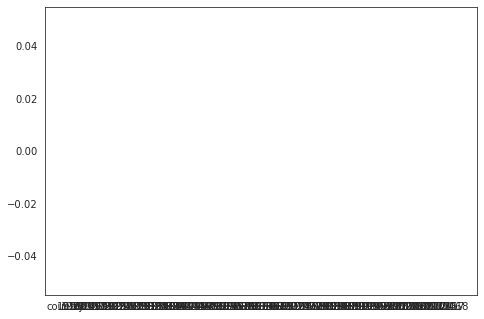

In [153]:
null_count=[]
for item in df_pop_final.columns:
    null_count.append(df_pop_final[item].isna().sum())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_pop_final.columns,null_count)
plt.show()

In [159]:
df_pop_new =pd.DataFrame()
for countries in df_co_final['country']:
    temp_df = df_pop_final[df_pop_final['country']==countries]
    df_pop_new=pd.concat([df_pop_new,temp_df])

In [160]:
df_pop_new

,country,1910,1911,1912,1913,1914,1915,1916,1917,1918,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
6,Argentina,6760000,6960000,7160000,7350000,7540000,7740000,7940000,8150000,8360000,...,40500000,40900000,41300000,41800000,42200000,42600000,43100000,43500000,43900000,44400000
7,Armenia,928000,936000,944000,953000,961000,970000,978000,987000,996000,...,2890000,2880000,2880000,2880000,2900000,2910000,2930000,2940000,2940000,2950000
8,Australia,4330000,4410000,4490000,4590000,4680000,4770000,4870000,4970000,5070000,...,21800000,22200000,22500000,22900000,23300000,23600000,23900000,24300000,24600000,24900000
9,Austria,6570000,6590000,6590000,6570000,6560000,6540000,6530000,6510000,6490000,...,8370000,8410000,8450000,8500000,8560000,8620000,8680000,8750000,8820000,8890000
10,Azerbaijan,2010000,2020000,2040000,2060000,2080000,2100000,2120000,2140000,2160000,...,8920000,9030000,9150000,9260000,9390000,9510000,9620000,9740000,9850000,9950000
15,Belarus,5380000,5430000,5480000,5530000,5590000,5640000,5690000,5740000,5790000,...,9430000,9420000,9420000,9420000,9420000,9430000,9440000,9450000,9450000,9450000
16,Belgium,7440000,7480000,7500000,7500000,7510000,7510000,7520000,7530000,7530000,...,10900000,10900000,11000000,11100000,11200000,11200000,11300000,11400000,11400000,11500000
23,Brazil,22400000,22800000,23300000,23800000,24300000,24900000,25400000,25900000,26500000,...,194000000,196000000,198000000,199000000,201000000,203000000,204000000,206000000,208000000,209000000
25,Bulgaria,4520000,4570000,4630000,4680000,4730000,4790000,4840000,4900000,4960000,...,7470000,7430000,7380000,7330000,7290000,7250000,7200000,7150000,7100000,7050000
30,Canada,7000000,7160000,7310000,7460000,7610000,7760000,7920000,8070000,8240000,...,33700000,34100000,34500000,34900000,35300000,35700000,36000000,36400000,36700000,37100000


In [195]:
df_new['1910'].

SyntaxError: invalid syntax (<ipython-input-195-8d2dce761701>, line 1)

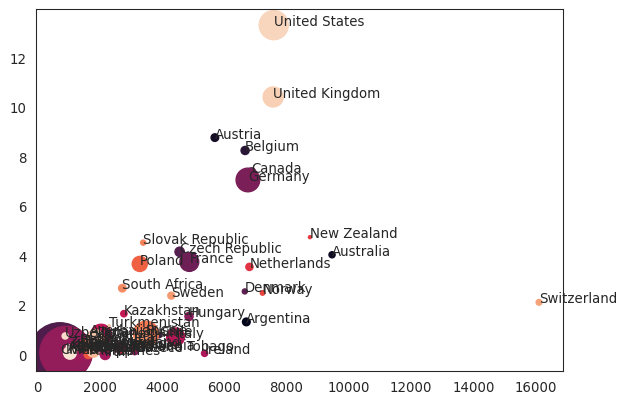

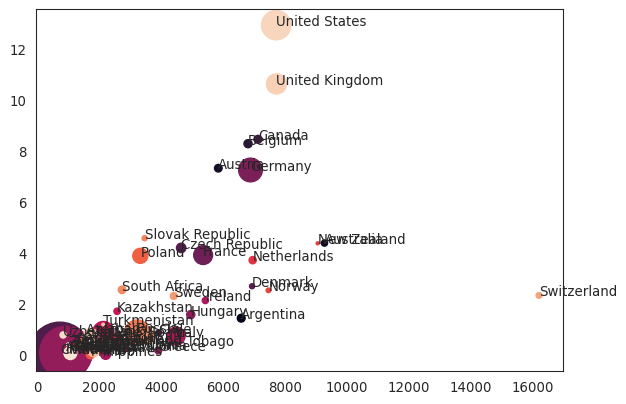

In [203]:

for i in range(1910,1912):
    fig,ax = plt.subplots(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
    plt.scatter(df_new[f"{i}"],df_co_final[f"{i}"],c=df_new_sampe['country'].cat.codes,s=df_pop_new[f"{i}"]/200000,label=np.array(df_new_sampe['country']))

    for a, txt in enumerate(df_new_sampe['country']):
        ax.annotate(txt, (df_new[f"{i}"].iloc[a],df_co_final[f"{i}"].iloc[a] ))
    
    
    plt.ylabel("CO2 Emissions")
    plt.xlabel("GDP per Capita")
    plt.title("Year: "+str(i) )
    plt.ylim(0,30)
    plt.xlim(0, 50000)
    filename='./images/Gapminder_step'+str(i)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()